In [ ]:
# Dataset can be found at: https://www.kaggle.com/datasets/aiaiaidavid/the-big-dataset-of-ultra-marathon-running/discussion/420633

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
# Load the dataframe
df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

<ipython-input-3-392f2b8edf63>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


In [ ]:
# Display the first few rows of the dataframe
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22.0,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0.0
1,2018,06.01.2018,Selva Costera (CHI),50km,22.0,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1.0
2,2018,06.01.2018,Selva Costera (CHI),50km,22.0,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2.0
3,2018,06.01.2018,Selva Costera (CHI),50km,22.0,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3.0
4,2018,06.01.2018,Selva Costera (CHI),50km,22.0,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4.0


In [ ]:
# Display the shape and data types of the dataframe
display(df.shape)
df.dtypes

(4684457, 13)

,0
Year of event,int64
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,float64
Athlete performance,object
Athlete club,object
Athlete country,object
Athlete year of birth,float64
Athlete gender,object


In [ ]:
# Filter for 50km and 50mi races in the USA in 2020
filtered_df = df[(df['Event distance/length'].isin(['50km', '50mi'])) &
 (df['Year of event'] == 2020) &
  (df['Event name'].str.extract(r'\((USA)\)')[0].notnull())]

In [ ]:
# Display the first few rows and shape of the filtered dataframe
display(filtered_df.head())
filtered_df.shape

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281.0


(26524, 13)

In [ ]:
# Calculate athlete age and extract performance from Athlete performance column
filtered_df['athlete_age'] = 2020 - filtered_df['Athlete year of birth']
filtered_df['Athlete performance'] = filtered_df['Athlete performance'].str.split(' ').str.get(0)
filtered_df.head()

<ipython-input-8-e6ef7febcae1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['athlete_age'] = 2020 - filtered_df['Athlete year of birth']
<ipython-input-8-e6ef7febcae1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Athlete performance'] = filtered_df['Athlete performance'].str.split(' ').str.get(0)


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287.0,29.0
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508.0,39.0
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838.0,21.0
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450.0,37.0
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281.0,43.0


In [ ]:
# Remove uneccessary columns
filtered_df = filtered_df.drop(['Year of event', 'Athlete club', 'Athlete country', 'Athlete year of birth', 'Athlete age category'], axis=1)
filtered_df.head()

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55,M,15.158,71287.0,29.0
2539946,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32,M,12.369,629508.0,39.0
2539947,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57,M,12.099,64838.0,21.0
2539948,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02,M,11.449,704450.0,37.0
2539949,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34,M,11.212,810281.0,43.0


In [ ]:
# Check for null values
display(filtered_df.isna().sum())
filtered_df[filtered_df['athlete_age'].isna()==1]

,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete gender,0
Athlete average speed,0
Athlete ID,0
athlete_age,235


,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
2547794,25.01.2020,North Carolina Fat Ass 50 Km (USA),50km,57.0,6:10:30,M,8.097,811923.0,NaN
2551331,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54.0,4:46:34,M,10.469,812656.0,NaN
2551336,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54.0,5:08:36,M,9.721,812657.0,NaN
2551344,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54.0,5:54:04,F,8.473,658221.0,NaN
2551348,19.01.2020,Big Bend 50 - Fresno Creek 50K (USA),50km,54.0,6:07:11,M,8.17,812660.0,NaN
...,...,...,...,...,...,...,...,...,...
2746543,17.10.2020,Black River Trail Classic 50 Km (USA),50km,8.0,8:31:26,F,5.866,857251.0,NaN
2749869,17.10.2020,MuleSkinner Endurance 50 Mile Race (USA),50mi,27.0,11:55:05,M,6.752,857957.0,NaN
2755985,10.10.2020,Man Against Horse 50 Mile Race (USA),50mi,23.0,9:03:25,M,8.885,859462.0,NaN
2755994,10.10.2020,Man Against Horse 50 Mile Race (USA),50mi,23.0,10:37:00,M,7.579,398583.0,NaN


In [ ]:
# Remove null values
filtered_df = filtered_df.dropna()
filtered_df.isna().sum()

,0
Event dates,0
Event name,0
Event distance/length,0
Event number of finishers,0
Athlete performance,0
Athlete gender,0
Athlete average speed,0
Athlete ID,0
athlete_age,0


In [ ]:
# Check for duplicate values
filtered_df[filtered_df.duplicated() == True]

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age


In [ ]:
# Reset index
filtered_df.reset_index(drop=True)

,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,athlete_age
0,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55,M,15.158,71287.0,29.0
1,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32,M,12.369,629508.0,39.0
2,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57,M,12.099,64838.0,21.0
3,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02,M,11.449,704450.0,37.0
4,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34,M,11.212,810281.0,43.0
...,...,...,...,...,...,...,...,...,...
26284,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30.0,7:07:48,F,7.013,816361.0,62.0
26285,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30.0,7:27:22,F,6.706,326469.0,43.0
26286,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30.0,7:27:24,F,6.705,372174.0,58.0
26287,03.10.2020,Yankee Springs Fall Trail Run Festival (USA),50km,30.0,7:38:30,F,6.543,860349.0,39.0


In [ ]:
# Convert data types of athlete_age and Athlete average speed
filtered_df['athlete_age'] = filtered_df['athlete_age'].astype(int)
filtered_df['Athlete average speed'] = filtered_df['Athlete average speed'].astype(float)
filtered_df.dtypes

,0
Event dates,object
Event name,object
Event distance/length,object
Event number of finishers,float64
Athlete performance,object
Athlete gender,object
Athlete average speed,float64
Athlete ID,float64
athlete_age,int64


In [ ]:
# Rename columns
filtered_df = filtered_df.rename(columns={'Year of event':	'year',
  'Event dates':	'race_day',
  'Event name':	'race_name',
  'Event distance/length':	'race_length',
  'Event number of finishers':	'race_number_of_finishers',
  'Athlete performance':	'athletic_performance',
  'Athlete gender': 'athlete_gender',
  'Athlete average speed':	'athlete_average_speed',
  'Athlete ID':	'athlete_id',
  })
filtered_df.head()

,race_day,race_name,race_length,race_number_of_finishers,athletic_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age
2539945,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55,M,15.158,71287.0,29
2539946,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32,M,12.369,629508.0,39
2539947,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57,M,12.099,64838.0,21
2539948,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02,M,11.449,704450.0,37
2539949,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34,M,11.212,810281.0,43


<Axes: xlabel='race_length', ylabel='Count'>

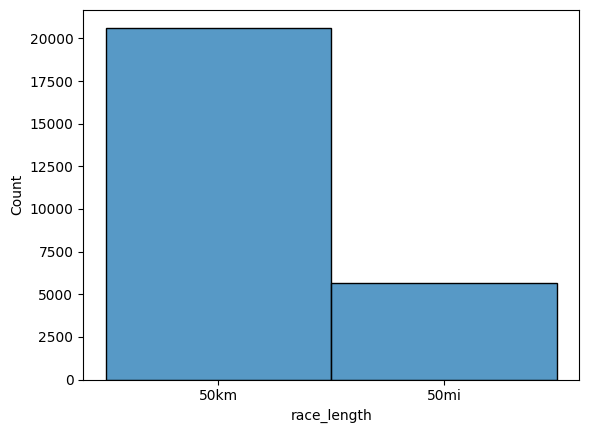

In [ ]:
# Create a histogram of race lengths
sns.histplot(filtered_df['race_length'])

<Axes: xlabel='race_length', ylabel='Count'>

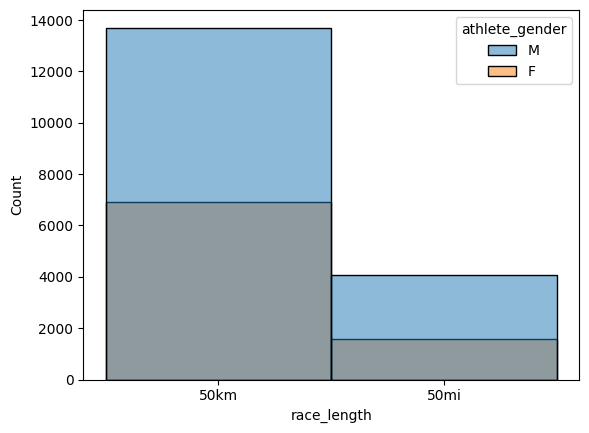

In [ ]:
# Create a histogram of race lengths with hue as athlete gender
sns.histplot(filtered_df, x='race_length', hue='athlete_gender')

<ipython-input-18-227f153a67e7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(filtered_df[filtered_df['race_length']=='50mi']['athlete_average_speed'])


<Axes: xlabel='athlete_average_speed', ylabel='Density'>

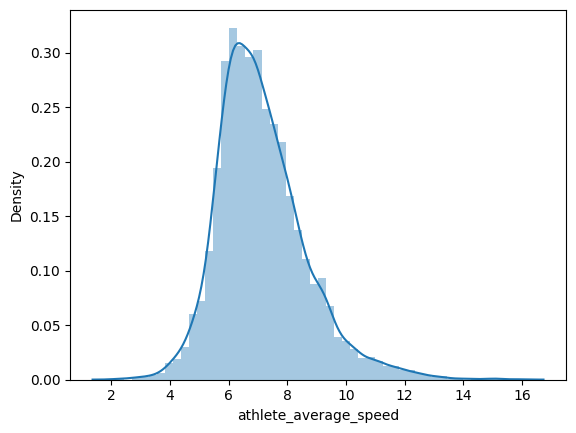

In [ ]:
# Create a distribution plot of athlete average speed for 50mi races
sns.distplot(filtered_df[filtered_df['race_length']=='50mi']['athlete_average_speed'])

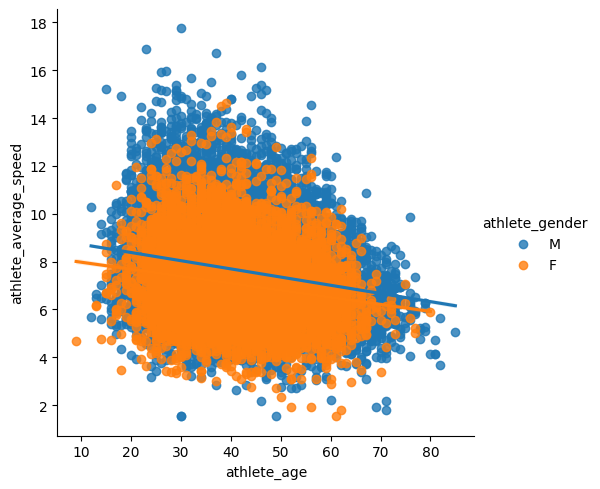

In [ ]:
# Create a linear model plot of athlete age and average speed with hue as athlete gender
sns.lmplot(x='athlete_age', y='athlete_average_speed', hue='athlete_gender', data=filtered_df)

In [ ]:
# Difference in speed for the 50k, 50mi male to female
filtered_df.groupby(['athlete_gender', 'race_length'])['athlete_average_speed'].mean()

athlete_gender  race_length
F               50km           7.092015
                50mi           6.830764
M               50km           7.743376
                50mi           7.249766
Name: athlete_average_speed, dtype: float64

In [ ]:
# What age are the best in the 50m race (20+ races min)
filtered_df.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False).query('count>19').head(10)

,mean,count
athlete_age,,
29,7.895574,136
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.471053,95
31,7.440842,139
38,7.420884,232
35,7.414633,196
36,7.394645,186


In [ ]:
# What age groups are the worst in the 50m race
filtered_df.query('race_length == "50mi"').groupby('athlete_age')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=True).query('count>9').head(10)

,mean,count
athlete_age,,
70,5.470667,12
65,5.934786,14
68,5.957500,10
67,6.114909,11
66,6.194300,10
60,6.227206,34
62,6.267564,39
61,6.358355,31
63,6.514806,31


In [ ]:
# Are runners slower in the summer than the winter?
filtered_df['race_month'] = filtered_df['race_day'].str.split('.').str.get(1).astype(int)
filtered_df.head()

,race_day,race_name,race_length,race_number_of_finishers,athletic_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month
2539945,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55,M,15.158,71287.0,29,2
2539946,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32,M,12.369,629508.0,39,2
2539947,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57,M,12.099,64838.0,21,2
2539948,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02,M,11.449,704450.0,37,2
2539949,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34,M,11.212,810281.0,43,2


In [ ]:
# Label with seasonal data
filtered_df['race_season'] = filtered_df['race_month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else 'Fall' if x in [9, 10, 11] else 'Spring' if x in [3, 4, 5] else 'Summer')
filtered_df.head()

,race_day,race_name,race_length,race_number_of_finishers,athletic_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month,race_season
2539945,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,3:17:55,M,15.158,71287.0,29,2,Winter
2539946,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:02:32,M,12.369,629508.0,39,2,Winter
2539947,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:07:57,M,12.099,64838.0,21,2,Winter
2539948,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:22:02,M,11.449,704450.0,37,2,Winter
2539949,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20.0,4:27:34,M,11.212,810281.0,43,2,Winter


In [ ]:
# Average Speed durring particular seasons
filtered_df.groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Spring,7.703542,3385
Winter,7.614325,10587
Fall,7.406619,8315
Summer,6.827451,4002


In [ ]:
# Average Speed durring particular seasons for 50mi only
filtered_df.query('race_length == "50mi"').groupby('race_season')['athlete_average_speed'].agg(['mean', 'count']).sort_values('mean', ascending=False)

,mean,count
race_season,,
Fall,7.511585,1997
Winter,7.303244,1327
Spring,7.082557,836
Summer,6.503958,1497


In [ ]:
# Find the top 3 fastest average speeds for each race
filtered_df.sort_values(by=['race_name', 'athlete_average_speed'], ascending=[True, False]).groupby('race_name').head(3)

,race_day,race_name,race_length,race_number_of_finishers,athletic_performance,athlete_gender,athlete_average_speed,athlete_id,athlete_age,race_month,race_season
2760712,03.10.2020,3 Days at the Fair 50 Km Race (USA),50km,6.0,3:36:18,M,13.870,860276.0,55,10,Fall
2760713,03.10.2020,3 Days at the Fair 50 Km Race (USA),50km,6.0,5:58:11,F,8.376,270737.0,52,10,Fall
2760714,03.10.2020,3 Days at the Fair 50 Km Race (USA),50km,6.0,7:49:41,M,6.387,208581.0,74,10,Fall
2549717,25.01.2020,AZT Oracle Rumble 50 Km (USA),50km,96.0,4:21:45,M,11.461,62429.0,35,1,Winter
2549718,25.01.2020,AZT Oracle Rumble 50 Km (USA),50km,96.0,4:51:34,M,10.289,812321.0,27,1,Winter
...,...,...,...,...,...,...,...,...,...,...,...
2740232,24.10.2020,Yippee-Ki-Yay 50 km Race (USA),50km,32.0,4:26:51,M,11.242,523855.0,52,10,Fall
2740233,24.10.2020,Yippee-Ki-Yay 50 km Race (USA),50km,32.0,4:32:56,M,10.992,144872.0,35,10,Fall
2662303,12.09.2020,Youngstown Ultra Trail Classic 50K (USA),50km,43.0,4:41:47,M,10.646,50452.0,44,9,Fall
2662304,12.09.2020,Youngstown Ultra Trail Classic 50K (USA),50km,43.0,4:42:36,M,10.616,52236.0,54,9,Fall


In [ ]:
# Calculate the average finishing time for each race
filtered_df['finish_time_seconds'] = (filtered_df['athletic_performance'].str.split(':').str[0].astype(int) * 3600) + \
                                    (filtered_df['athletic_performance'].str.split(':').str[1].astype(int) * 60) + \
                                    (filtered_df['athletic_performance'].str.split(':').str[2].astype(int))
avg_finish_time = filtered_df.groupby('race_name')['finish_time_seconds'].mean()

In [ ]:
# Display average finishing times for each race
print(avg_finish_time)

race_name
3 Days at the Fair 50 Km Race (USA)             25888.333333
AZT Oracle Rumble 50 Km (USA)                   27242.270833
AZT Oracle Rumble 50 Mile (USA)                 43547.848485
Algonquin 50km Trail Race (USA)                 23317.262712
Ancient Lakes 50 km Trail Run (USA)             27662.063291
                                                    ...     
Yankee Springs 50 km Winter Challenge (USA)     22858.628571
Yankee Springs Fall Trail Run Festival (USA)    21271.433333
Yeti Snakebite 50 km (USA)                      28322.206897
Yippee-Ki-Yay 50 km Race (USA)                  20698.593750
Youngstown Ultra Trail Classic 50K (USA)        26203.372093
Name: finish_time_seconds, Length: 496, dtype: float64


In [ ]:
# Analyze correlation between age and average speed for each race length
correlation_50km = filtered_df[filtered_df['race_length'] == '50km']['athlete_age'].corr(filtered_df[filtered_df['race_length'] == '50km']['athlete_average_speed'])
correlation_50mi = filtered_df[filtered_df['race_length'] == '50mi']['athlete_age'].corr(filtered_df[filtered_df['race_length'] == '50mi']['athlete_average_speed'])

In [ ]:
print(f"Correlation between age and average speed for 50km races: {correlation_50km}")
print(f"Correlation between age and average speed for 50mi races: {correlation_50mi}")

Correlation between age and average speed for 50km races: -0.21245504106408378
Correlation between age and average speed for 50mi races: -0.20039613216276064


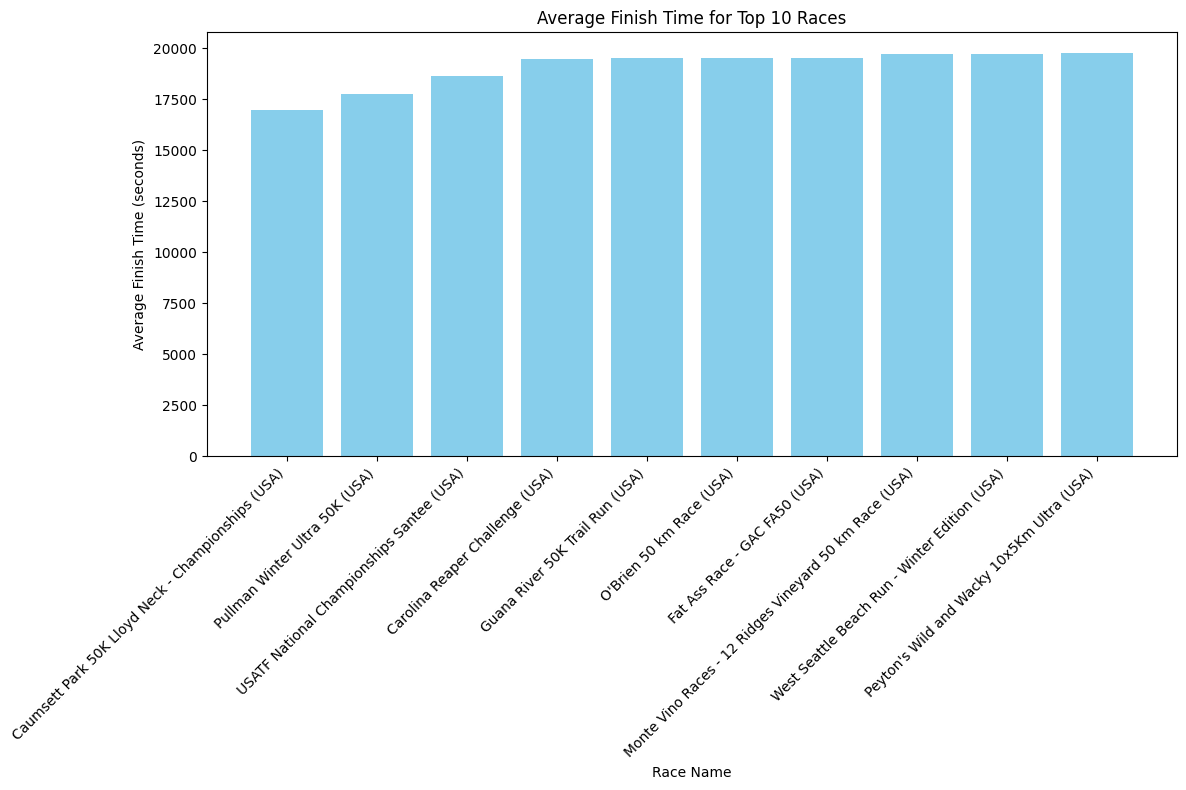

In [ ]:
# Calculate average finish time for each race
avg_finish_time = filtered_df.groupby('race_name')['finish_time_seconds'].mean()

# Sort race names by average finish time and select top 10
top_10_races = avg_finish_time.sort_values().head(10).index

# Create a bar plot of average finish times for top 10 races
plt.figure(figsize=(12, 8))
plt.bar(top_10_races, avg_finish_time[top_10_races], color='skyblue')
plt.title('Average Finish Time for Top 10 Races')
plt.xlabel('Race Name')
plt.ylabel('Average Finish Time (seconds)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the overall average speed for all runners
avg_speed = np.mean(filtered_df['athlete_average_speed'])
print(f"Overall average speed: {avg_speed}")

Overall average speed: 7.440330100041842


In [ ]:
# Calculate the standard deviation of average speeds
speed_std = np.std(filtered_df['athlete_average_speed'])
print(f"Standard deviation of average speeds: {speed_std}")

Standard deviation of average speeds: 1.7107642112795214


In [ ]:
# Find the 10th and 90th percentiles of average speeds
speed_percentiles = np.percentile(filtered_df['athlete_average_speed'], [10, 90])
print(f"10th percentile of average speeds: {speed_percentiles[0]}")
print(f"90th percentile of average speeds: {speed_percentiles[1]}")

10th percentile of average speeds: 5.547
90th percentile of average speeds: 9.678


In [ ]:
# Create a numpy array of athlete ages and calculate the average age
athlete_ages = filtered_df['athlete_age'].to_numpy()
avg_age = np.mean(athlete_ages)
print(f"Average age of athletes: {avg_age}")

Average age of athletes: 41.8710487276047


In [ ]:
# Calculate the correlation coefficient between age and speed using numpy
correlation_coefficient = np.corrcoef(filtered_df['athlete_age'], filtered_df['athlete_average_speed'])[0, 1]
print(f"Correlation coefficient between age and speed: {correlation_coefficient}")

Correlation coefficient between age and speed: -0.20450666858853125
